In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_wine, make_classification, make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import (accuracy_score, mean_squared_error, classification_report, 
                            precision_recall_fscore_support, roc_auc_score, confusion_matrix)
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest, f_classif

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
# =============================================
# 1. KNN Classifier on Iris dataset
# =============================================
iris = load_iris()
X_iris, y_iris = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.3)

knn_iris = KNeighborsClassifier(n_neighbors=5)
knn_iris.fit(X_train, y_train)
iris_acc = knn_iris.score(X_test, y_test)
print(f"1. Iris KNN Accuracy: {iris_acc:.4f}\n")

1. Iris KNN Accuracy: 1.0000



In [3]:
# =============================================
# 2. KNN Regressor on synthetic data
# =============================================
X_reg, y_reg = make_regression(n_samples=200, n_features=5, noise=10)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3)

knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = knn_reg.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"2. KNN Regressor MSE: {mse:.4f}\n")

2. KNN Regressor MSE: 5809.4992



In [4]:
# =============================================
# 3. KNN with different distance metrics
# =============================================
metrics = ['euclidean', 'manhattan']
for metric in metrics:
    knn_metric = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn_metric.fit(X_train, y_train)
    acc = knn_metric.score(X_test, y_test)
    print(f"3. KNN with {metric} distance - Accuracy: {acc:.4f}")
print()

3. KNN with euclidean distance - Accuracy: 1.0000
3. KNN with manhattan distance - Accuracy: 1.0000



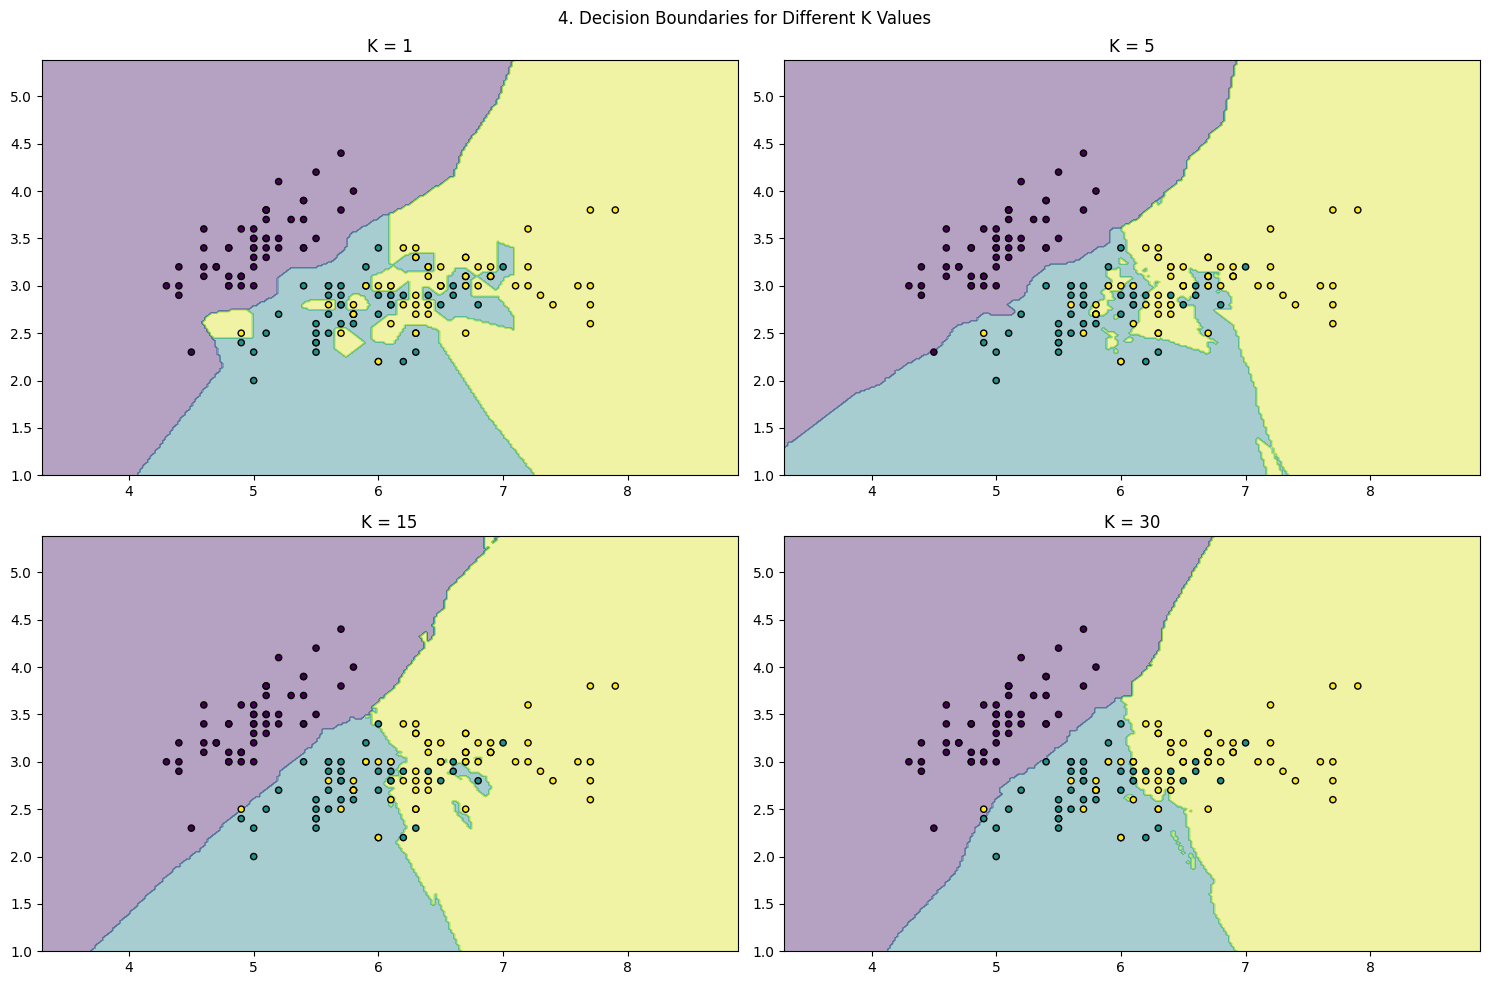

In [5]:
# =============================================
# 4. KNN with different K values (visualization)
# =============================================
plt.figure(figsize=(15, 10))
for i, k in enumerate([1, 5, 15, 30]):
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_iris[:, :2], y_iris)  # Use first 2 features for visualization
    
    # Create meshgrid for decision boundaries
    x_min, x_max = X_iris[:, 0].min() - 1, X_iris[:, 0].max() + 1
    y_min, y_max = X_iris[:, 1].min() - 1, X_iris[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    Z = knn_k.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.subplot(2, 2, i+1)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, s=20, edgecolor='k')
    plt.title(f'K = {k}')
plt.suptitle('4. Decision Boundaries for Different K Values')
plt.tight_layout()
plt.show()

In [6]:
# =============================================
# 5. Feature Scaling comparison
# =============================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
unscaled_acc = knn_unscaled.score(X_test, y_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
scaled_acc = knn_scaled.score(X_test_scaled, y_test)

print(f"5. Accuracy without scaling: {unscaled_acc:.4f}")
print(f"   Accuracy with scaling: {scaled_acc:.4f}\n")

5. Accuracy without scaling: 1.0000
   Accuracy with scaling: 1.0000



In [7]:
# =============================================
# 6. PCA on synthetic data with explained variance
# =============================================
X_pca, _ = make_classification(n_samples=200, n_features=10, n_informative=5)
pca = PCA().fit(X_pca)
print("6. Explained variance ratio per component:")
print(pca.explained_variance_ratio_)
print()

6. Explained variance ratio per component:
[2.94158563e-01 2.17414878e-01 1.67377177e-01 1.17435742e-01
 6.37415893e-02 5.14675974e-02 4.67335245e-02 4.16709303e-02
 9.26663367e-17 0.00000000e+00]



In [8]:
# =============================================
# 7. PCA + KNN comparison
# =============================================
# Without PCA
knn_no_pca = KNeighborsClassifier(n_neighbors=5)
knn_no_pca.fit(X_train, y_train)
acc_no_pca = knn_no_pca.score(X_test, y_test)

# With PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
acc_pca = knn_pca.score(X_test_pca, y_test)

print(f"7. KNN Accuracy without PCA: {acc_no_pca:.4f}")
print(f"   KNN Accuracy with PCA (2 components): {acc_pca:.4f}\n")

7. KNN Accuracy without PCA: 1.0000
   KNN Accuracy with PCA (2 components): 1.0000



In [9]:
# =============================================
# 8. Hyperparameter tuning with GridSearchCV
# =============================================
param_grid = {'n_neighbors': range(1, 20),
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
print(f"8. Best KNN parameters: {grid.best_params_}")
print(f"   Best cross-validation score: {grid.best_score_:.4f}\n")

8. Best KNN parameters: {'metric': 'euclidean', 'n_neighbors': 18, 'weights': 'distance'}
   Best cross-validation score: 0.9619



In [10]:
# =============================================
# 9. Misclassified samples count
# =============================================
y_pred = knn_iris.predict(X_test)
misclassified = (y_pred != y_test).sum()
print(f"9. Number of misclassified samples: {misclassified}/{len(y_test)}\n")

9. Number of misclassified samples: 0/45



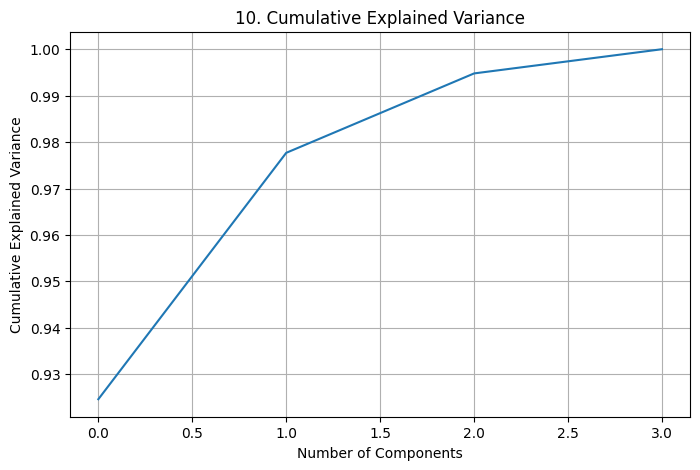

In [11]:
# =============================================
# 10. PCA cumulative explained variance
# =============================================
pca = PCA().fit(X_iris)
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('10. Cumulative Explained Variance')
plt.grid()
plt.show()

In [12]:
# =============================================
# 11. KNN with uniform vs distance weights
# =============================================
for weight in ['uniform', 'distance']:
    knn_weight = KNeighborsClassifier(n_neighbors=5, weights=weight)
    knn_weight.fit(X_train, y_train)
    acc = knn_weight.score(X_test, y_test)
    print(f"11. KNN with {weight} weights - Accuracy: {acc:.4f}")
print()

11. KNN with uniform weights - Accuracy: 1.0000
11. KNN with distance weights - Accuracy: 1.0000



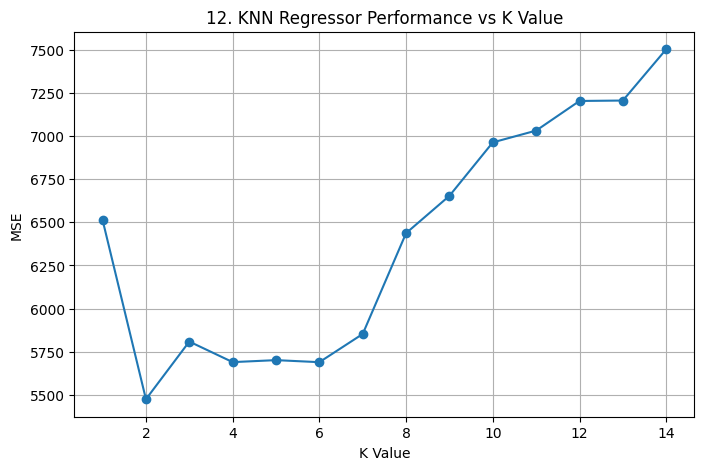

In [13]:
# =============================================
# 12. KNN Regressor with different K values
# =============================================
k_values = range(1, 15)
mse_scores = []
for k in k_values:
    knn_k = KNeighborsRegressor(n_neighbors=k)
    knn_k.fit(X_train_reg, y_train_reg)
    y_pred = knn_k.predict(X_test_reg)
    mse_scores.append(mean_squared_error(y_test_reg, y_pred))

plt.figure(figsize=(8, 5))
plt.plot(k_values, mse_scores, marker='o')
plt.xlabel('K Value')
plt.ylabel('MSE')
plt.title('12. KNN Regressor Performance vs K Value')
plt.grid()
plt.show()

In [14]:
# =============================================
# 13. KNN Imputation for missing values
# =============================================
X_missing = X_iris.copy()
mask = np.random.rand(*X_missing.shape) < 0.1  # 10% missing values
X_missing[mask] = np.nan

imputer = KNNImputer(n_neighbors=3)
X_imputed = imputer.fit_transform(X_missing)
print(f"13. Original data with missing values:\n{X_missing[:5]}")
print(f"\nImputed data:\n{X_imputed[:5].round(2)}\n")

13. Original data with missing values:
[[5.1 3.5 nan 0.2]
 [4.9 3.  nan 0.2]
 [4.7 3.2 1.3 nan]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 nan 0.2]]

Imputed data:
[[5.1  3.5  1.5  0.2 ]
 [4.9  3.   1.5  0.2 ]
 [4.7  3.2  1.3  0.23]
 [4.6  3.1  1.5  0.2 ]
 [5.   3.6  1.43 0.2 ]]



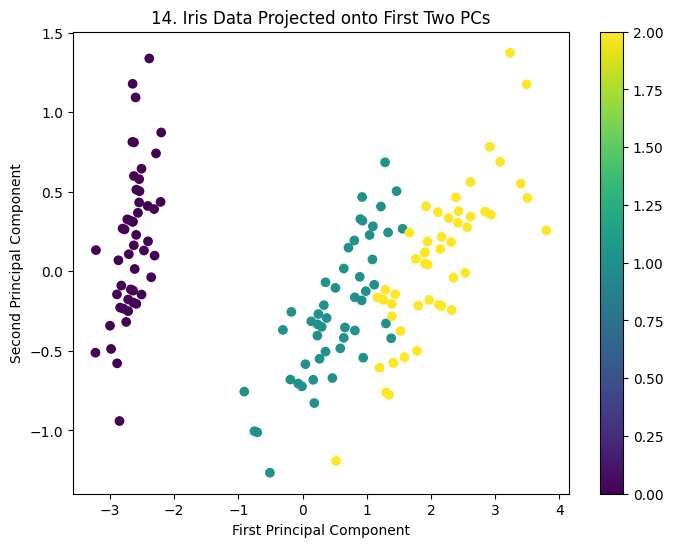

In [15]:
# =============================================
# 14. PCA projection visualization
# =============================================
pca = PCA(n_components=2)
X_pca_vis = pca.fit_transform(X_iris)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_vis[:, 0], X_pca_vis[:, 1], c=y_iris, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('14. Iris Data Projected onto First Two PCs')
plt.colorbar()
plt.show()

In [30]:
# =============================================
# 15. KD Tree vs Ball Tree comparison
# =============================================
algorithms = ['kd_tree', 'ball_tree']
for algo in algorithms:
    start = Time.time()
    knn_algo = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    knn_algo.fit(X_train, y_train)
    acc = knn_algo.score(X_test, y_test)
    elapsed = time.time() - start
    print(f"15. {algo} - Accuracy: {acc:.4f}, Time: {elapsed:.4f}s")
print()

NameError: name 'Time' is not defined

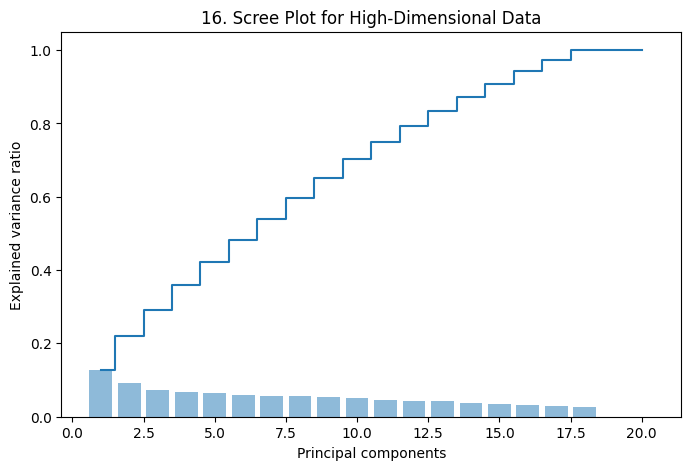

In [17]:
# =============================================
# 16. PCA Scree plot on high-dim data
# =============================================
X_high_dim, _ = make_classification(n_samples=200, n_features=20)
pca = PCA().fit(X_high_dim)

plt.figure(figsize=(8, 5))
plt.bar(range(1, 21), pca.explained_variance_ratio_[:20], alpha=0.5, align='center')
plt.step(range(1, 21), np.cumsum(pca.explained_variance_ratio_[:20]), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('16. Scree Plot for High-Dimensional Data')
plt.show()

In [18]:
# =============================================
# 17. KNN with precision, recall, F1-score
# =============================================
y_pred = knn_iris.predict(X_test)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(f"17. Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")

17. Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



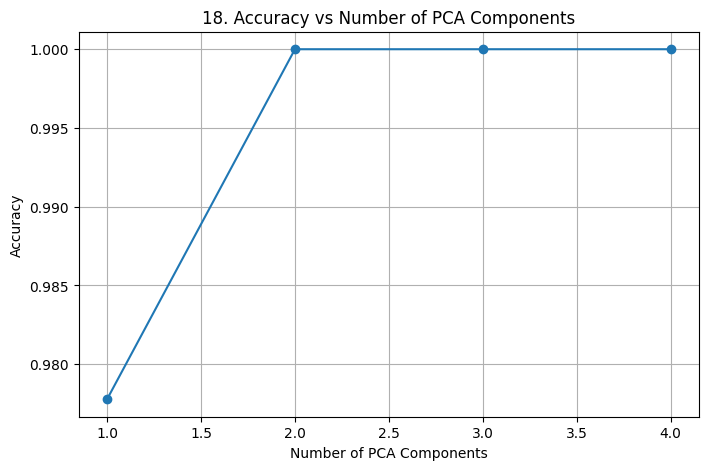

In [19]:
# =============================================
# 18. PCA components vs accuracy
# =============================================
components = range(1, 5)
acc_scores = []
for n in components:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_pca, y_train)
    acc_scores.append(knn.score(X_test_pca, y_test))

plt.figure(figsize=(8, 5))
plt.plot(components, acc_scores, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.title('18. Accuracy vs Number of PCA Components')
plt.grid()
plt.show()

In [20]:
# =============================================
# 19. KNN with different leaf_size values
# =============================================
leaf_sizes = [10, 20, 30, 40, 50]
for leaf in leaf_sizes:
    knn_leaf = KNeighborsClassifier(n_neighbors=5, leaf_size=leaf)
    knn_leaf.fit(X_train, y_train)
    acc = knn_leaf.score(X_test, y_test)
    print(f"19. leaf_size={leaf} - Accuracy: {acc:.4f}")
print()

19. leaf_size=10 - Accuracy: 1.0000
19. leaf_size=20 - Accuracy: 1.0000
19. leaf_size=30 - Accuracy: 1.0000
19. leaf_size=40 - Accuracy: 1.0000
19. leaf_size=50 - Accuracy: 1.0000



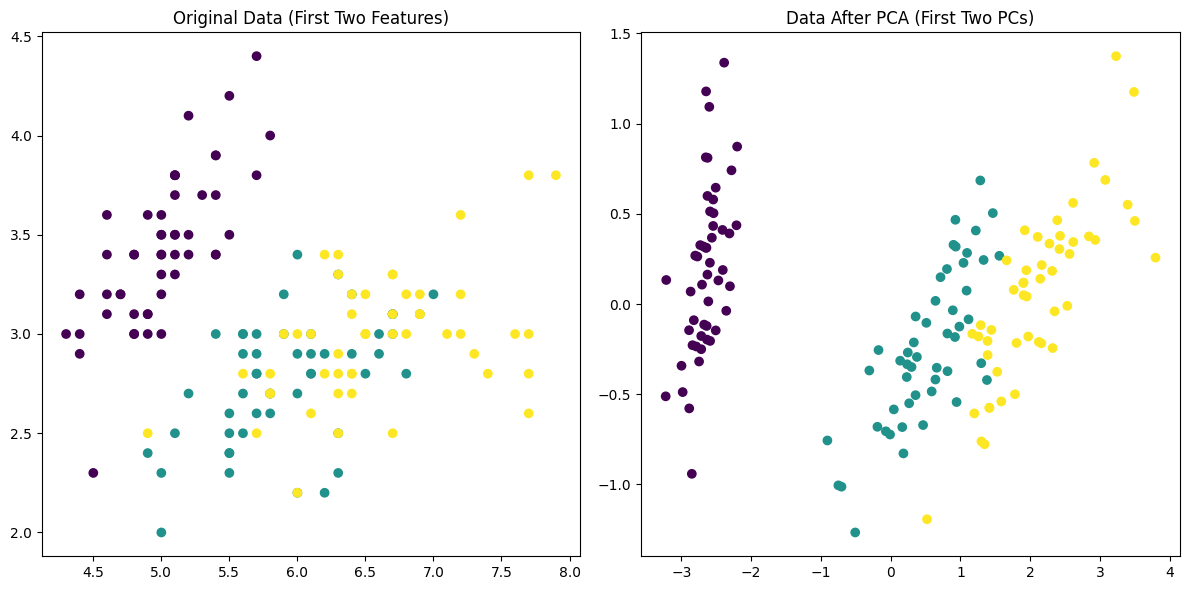

In [21]:
# =============================================
# 20. Data transformation before/after PCA
# =============================================
pca = PCA(n_components=2)
X_pca_transformed = pca.fit_transform(X_iris)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, cmap='viridis')
plt.title('Original Data (First Two Features)')
plt.subplot(1, 2, 2)
plt.scatter(X_pca_transformed[:, 0], X_pca_transformed[:, 1], c=y_iris, cmap='viridis')
plt.title('Data After PCA (First Two PCs)')
plt.tight_layout()
plt.show()

In [22]:
# =============================================
# 21. KNN on Wine dataset with classification report
# =============================================
wine = load_wine()
X_wine, y_wine = wine.data, wine.target
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_wine, y_wine, test_size=0.3)

knn_wine = KNeighborsClassifier(n_neighbors=5)
knn_wine.fit(X_train_w, y_train_w)
y_pred_w = knn_wine.predict(X_test_w)

print("21. Wine Dataset Classification Report:")
print(classification_report(y_test_w, y_pred_w))

21. Wine Dataset Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        15
           1       0.52      0.76      0.62        17
           2       0.88      0.32      0.47        22

    accuracy                           0.65        54
   macro avg       0.70      0.69      0.64        54
weighted avg       0.72      0.65      0.62        54



In [23]:
# =============================================
# 22. KNN Regressor with different distance metrics
# =============================================
metrics = ['euclidean', 'manhattan', 'chebyshev']
for metric in metrics:
    knn_reg_metric = KNeighborsRegressor(n_neighbors=3, metric=metric)
    knn_reg_metric.fit(X_train_reg, y_train_reg)
    y_pred = knn_reg_metric.predict(X_test_reg)
    mse = mean_squared_error(y_test_reg, y_pred)
    print(f"22. KNN Regressor with {metric} distance - MSE: {mse:.4f}")
print()

22. KNN Regressor with euclidean distance - MSE: 5809.4992
22. KNN Regressor with manhattan distance - MSE: 5685.3864
22. KNN Regressor with chebyshev distance - MSE: 5434.8718



In [24]:
# =============================================
# 23. KNN with ROC-AUC score (binary classification)
# =============================================
X_bin, y_bin = make_classification(n_samples=200, n_classes=2)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bin, y_bin, test_size=0.3)

knn_bin = KNeighborsClassifier(n_neighbors=5)
knn_bin.fit(X_train_b, y_train_b)
y_proba = knn_bin.predict_proba(X_test_b)[:, 1]
roc_auc = roc_auc_score(y_test_b, y_proba)
print(f"23. KNN ROC-AUC Score: {roc_auc:.4f}\n")

23. KNN ROC-AUC Score: 0.9283



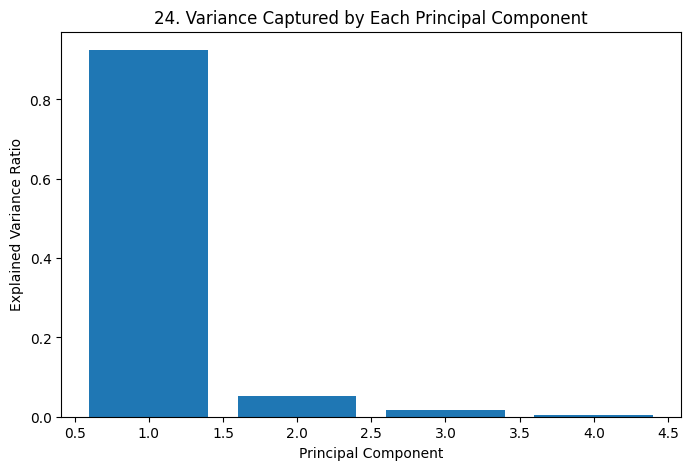

In [25]:
# =============================================
# 24. PCA variance per component
# =============================================
pca = PCA().fit(X_iris)
plt.figure(figsize=(8, 5))
plt.bar(range(1, 5), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('24. Variance Captured by Each Principal Component')
plt.show()


In [26]:
# =============================================
# 25. KNN with feature selection
# =============================================
selector = SelectKBest(f_classif, k=2)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

knn_selected = KNeighborsClassifier(n_neighbors=5)
knn_selected.fit(X_train_selected, y_train)
acc_selected = knn_selected.score(X_test_selected, y_test)

print(f"25. Accuracy with all features: {knn_iris.score(X_test, y_test):.4f}")
print(f"   Accuracy with selected features (best 2): {acc_selected:.4f}\n")




25. Accuracy with all features: 1.0000
   Accuracy with selected features (best 2): 1.0000



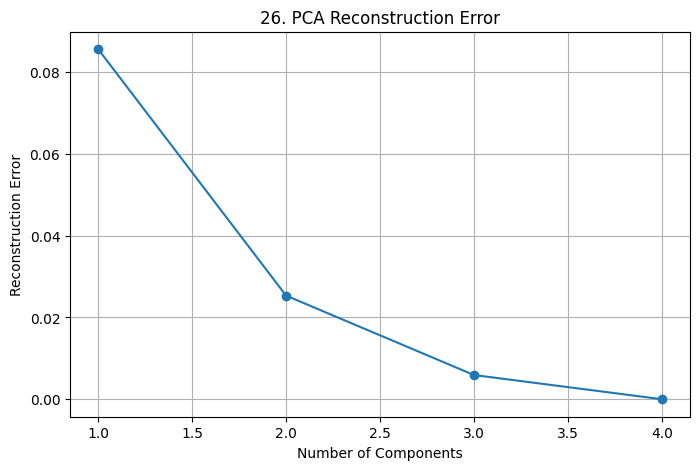

In [27]:
# =============================================
# 26. PCA reconstruction error
# =============================================
components = range(1, 5)
recon_errors = []
for n in components:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_iris)
    X_recon = pca.inverse_transform(X_pca)
    error = np.mean((X_iris - X_recon) ** 2)
    recon_errors.append(error)

plt.figure(figsize=(8, 5))
plt.plot(components, recon_errors, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.title('26. PCA Reconstruction Error')
plt.grid()
plt.show()


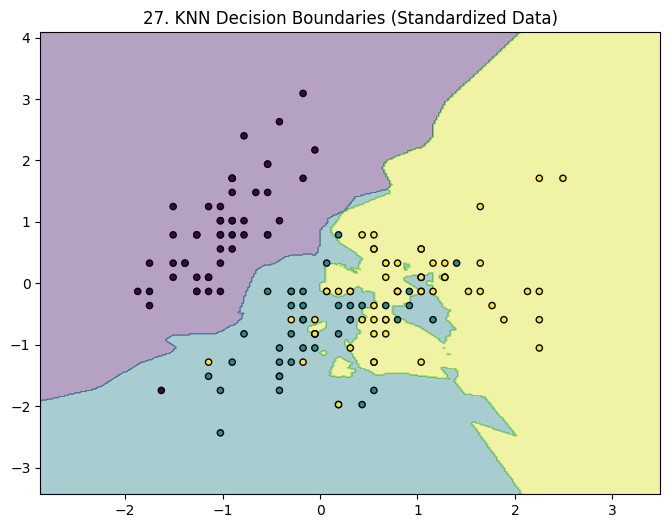

In [28]:
# =============================================
# 27. KNN decision boundary visualization
# =============================================
# (Similar to task 4, but with standardized data)
X_iris_2d = StandardScaler().fit_transform(X_iris[:, :2])
knn_db = KNeighborsClassifier(n_neighbors=5)
knn_db.fit(X_iris_2d, y_iris)

# Create meshgrid
x_min, x_max = X_iris_2d[:, 0].min() - 1, X_iris_2d[:, 0].max() + 1
y_min, y_max = X_iris_2d[:, 1].min() - 1, X_iris_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn_db.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_iris_2d[:, 0], X_iris_2d[:, 1], c=y_iris, s=20, edgecolor='k')
plt.title('27. KNN Decision Boundaries (Standardized Data)')
plt.show()


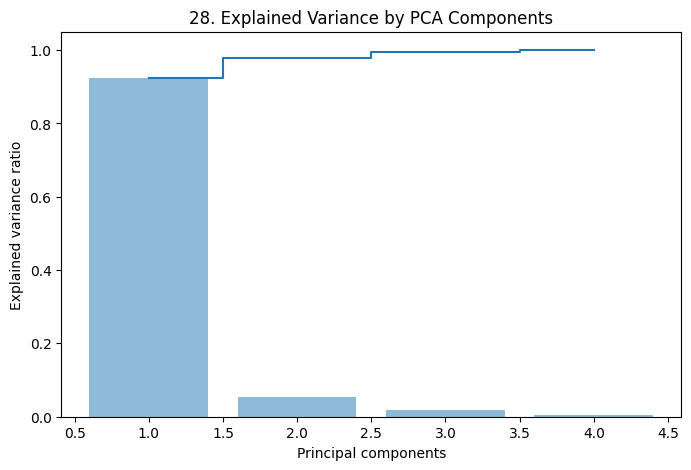

In [29]:
# =============================================
# 28. PCA components vs explained variance
# =============================================
# (Similar to task 18 but focusing on variance)
pca = PCA().fit(X_iris)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.bar(range(1, 5), explained_variance, alpha=0.5, align='center')
plt.step(range(1, 5), np.cumsum(explained_variance), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('28. Explained Variance by PCA Components')
plt.show()